In [1]:
import numpy
# import dask
import os
import numpy as np
# import esmpy.util.helpers as helpers
# import esmpy.api.constants as constants
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# import xesmf as xe

In [3]:
# !ESMF_PrintInfo

In [4]:
ins = xr.open_dataset('../mesh-test/ugrid-mesh-vars.nc')
outs = xr.open_dataset('../mesh-test/ugrid-mesh_out.nc')

In [5]:
weights = xr.open_dataset('../mesh-test/weights-vars.nc')

In [6]:
weights

<xarray.Dataset>
Dimensions:        (src_grid_rank: 1, dst_grid_rank: 1, n_a: 1474560,
                    n_b: 226800, nv_a: 3, nv_b: 3, n_s: 1960)
Dimensions without coordinates: src_grid_rank, dst_grid_rank, n_a, n_b, nv_a,
                                nv_b, n_s
Data variables: (12/19)
    src_grid_dims  (src_grid_rank) int32 ...
    dst_grid_dims  (dst_grid_rank) int32 ...
    yc_a           (n_a) float64 ...
    yc_b           (n_b) float64 ...
    xc_a           (n_a) float64 ...
    xc_b           (n_b) float64 ...
    ...             ...
    area_b         (n_b) float64 ...
    frac_a         (n_a) float64 ...
    frac_b         (n_b) float64 ...
    col            (n_s) int32 ...
    row            (n_s) int32 ...
    S              (n_s) float64 ...
Attributes:
    title:               ESMF Offline Regridding Weight Generator
    normalization:       destarea
    map_method:          Bilinear remapping
    ESMF_regrid_method:  Bilinear
    conventions:         NCAR-CSM
    domain_a:            ugrid-mesh-vars.nc
    domain_b:            ugrid-mesh_out.nc
    grid_file_src:       ugrid-mesh-vars.nc
    grid_file_dst:       ugrid-mesh_out.nc
    ESMF_version:        (No version information available.)

In [7]:
np.sum(weights.frac_b == 0), np.sum(weights.frac_b != 0)

(<xarray.DataArray 'frac_b' ()>
 array(226310),
 <xarray.DataArray 'frac_b' ()>
 array(490))

In [8]:
np.sum(weights.frac_a == 0), np.sum(weights.frac_a!= 0)

(<xarray.DataArray 'frac_a' ()>
 array(1474560),
 <xarray.DataArray 'frac_a' ()>
 array(0))

In [9]:
weights.n_b.values

array([     0,      1,      2, ..., 226797, 226798, 226799])

In [10]:
weights.n_s.values

array([   0,    1,    2, ..., 1957, 1958, 1959])

In [11]:
weights.src_grid_dims.values, weights.dst_grid_dims.values

(array([1474560], dtype=int32), array([226800], dtype=int32))

In [12]:
226800/72

3150.0

In [13]:
226800/1960

115.71428571428571

In [14]:
1448400/1960

738.9795918367347

In [16]:
# dsts = []
# for i in weights.n_s.values:
#     dsts.append(ins.edens.isel(time=0)[weights.row.values[i]] + weights.S.values[i]*ins.edens.isel(time=0).values[weights.col.values[i]])

In [ ]:
# dsts = np.array(dsts)

In [17]:
# dsts.shape

In [18]:
len(weights.xc_b.values)/len(np.unique(outs.height.values)), len(np.unique(outs.height.values)), 

(3150.0, 72)

In [19]:
np.max(dsts)

926016.4241943359

In [20]:
ins

<xarray.Dataset>
Dimensions:   (nnodes: 1474560, ncells: 1448400, eight: 8, time: 20)
Dimensions without coordinates: nnodes, ncells, eight, time
Data variables:
    nodelon   (nnodes) float64 ...
    nodelat   (nnodes) float64 ...
    height    (nnodes) float64 ...
    vertids   (ncells, eight) int32 ...
    meshtype  (ncells) int32 ...
    edens     (time, nnodes) float64 ...
    odens     (time, nnodes) float64 ...
    ndens     (time, nnodes) float64 ...
    mere      (time, nnodes) float64 ...
    zone      (time, nnodes) float64 ...
    smesh     int32 ...

In [33]:
lats = outs.nodelon[weights.row.values]
lons = outs.nodelat[weights.row.values]
alts = outs.height[weights.row.values]

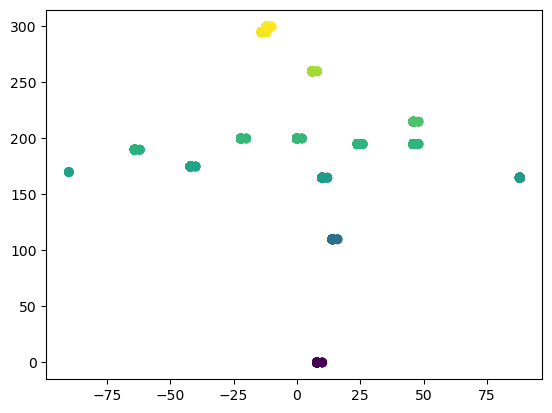

In [34]:
plt.scatter(lons, lats, c = alts)

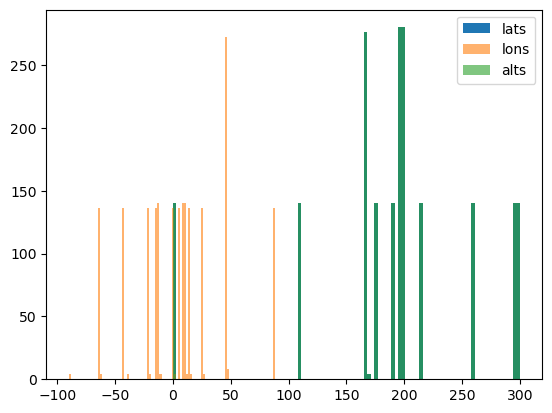

In [36]:
plt.hist(lats, bins = 100, label = 'lats')
# plt.show()
plt.hist(lons, bins = 100, label = 'lons', alpha = 0.6)
plt.hist(alts, bins = 100, label = 'alts', alpha = 0.6)
plt.legend()
plt.show()

In [32]:
np.sum((lats == lons))

<xarray.DataArray 'nodelon' ()>
array(1960)